# 泰坦尼克号生存预测——数据预处理与模型选择

LIJIANcoder97

# 数据预处理与模型选择
### 上一个文件已经通过可视化进行了数据探索，没有发现关联度特别高的属性，图像无法发现的奥秘，或许能通过数学揭示。在这里将对数据进一步处理以满足模型的要求
---
### 包括
- 去除不相关属性
- 创建更有代表性的特征属性
- 文本转数字
- 缺失值处理
- X,Y分离

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### 调用sklearn LabelEncoder()，进行编码，文本转数字。

In [2]:
def encode_features(data_set, feature_names):
    for feature_name in feature_names:
        le = LabelEncoder()
        le.fit(data_set[feature_name])
        encoded_column = le.transform(data_set[feature_name])
        data_set[feature_name] = encoded_column
    return data_set

In [3]:
Taitan_train=pd.read_csv('dataset/titanic/train.csv')

In [4]:
Taitan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Taitan_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

数据规模为891，cabin缺失687，该属性没有意义
name 对最后的预测没有影响，drop.

Ticket 属性看起毫无规律，无法提取有用信息所以我们删掉它。值得一提的是Cabin属性（船舱号），它的首字母看起来代表了船舱所在区域的编码，这很有意义，在删掉这个之前，看看它的规律。

In [6]:
Taitan_cabin=Taitan_train[['Cabin','Survived']]
Taitan_cabin.head()

,Cabin,Survived
0,NaN,0
1,C85,1
2,NaN,1
3,C123,1
4,NaN,0


丢弃cadin属性值为空的行，再将cabin分类属性变为数字。

In [7]:
Taitan_cabin['bark']=[n for n in Taitan_cabin['Cabin']]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


丢弃'Cabin','Name','Ticket'属性列

In [8]:
Taitan_train=Taitan_train.drop(['Cabin','Name','Ticket'],axis=1)

In [9]:
Taitan_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### 对sex embark属性进行编码

In [10]:
le = LabelEncoder()
le.fit(Taitan_train['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [11]:
Taitan_train['Sex']=le.transform(Taitan_train['Sex']) 

#### Embarked 属性有缺失值，要先进行处理，缺失值替换为最多的登船口

In [12]:
Taitan_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
Taitan_train['Embarked'] = Taitan_train['Embarked'].fillna('S')

In [14]:
l = LabelEncoder()
l.fit(Taitan_train['Embarked'])
l.classes_

array(['C', 'Q', 'S'], dtype=object)

In [15]:
Taitan_train['Embarked']=l.transform(Taitan_train['Embarked']) 

In [16]:
Taitan_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


#### 编码完毕
### 对Age 属性进行处理，缺失值替换

In [17]:
Taitan_train['Age'] = Taitan_train['Age'].fillna(Taitan_train['Age'].median())
Taitan_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


再上一次作业的探索中发现了乘客存活率和SibSp，Parch两个属性有关系，但不明显。表现为亲人越多，存活率越低。
#### 创建family属性代表乘客的亲人数目探索其与存活率的关系

In [18]:
Taitan_train['Family']=Taitan_train['SibSp']+Taitan_train['Parch']+1
Taitan_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,1


观察相关性

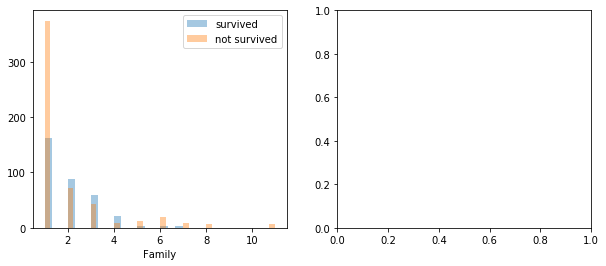

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.distplot(Taitan_train[Taitan_train['Survived']==1].Family.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(Taitan_train[Taitan_train['Survived']==0].Family.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
plt.xkcd()

In [20]:
Taitan_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262,-0.200988
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.783111
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.217138
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.066516
Family,-0.040143,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.217138,0.066516,1.000000


看起来还不错，通过观察SibSp，Parch属性和存活率的相关性，可以发现，配偶和兄弟姐妹比父母孩子对乘客的存活率影响更大。
##### 同时sex属性相比其他属性对乘客的存活率影响很大，让我们看一下这个有趣的事情。

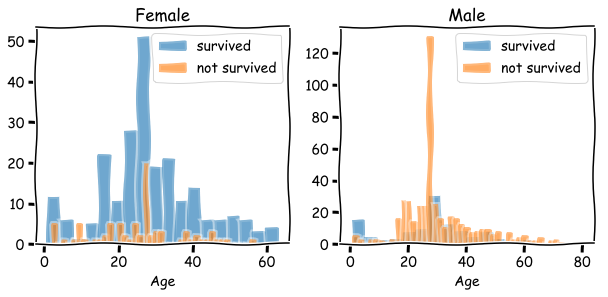

In [21]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = Taitan_train[Taitan_train['Sex']==0]
men = Taitan_train[Taitan_train['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
plt.xkcd()
_ = ax.set_title('Male')

现在已经有了清理好的数据集了

In [22]:
Taitan_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,1


In [23]:
Taitan_p=Taitan_train['Survived']
Taitan_train=Taitan_train.drop(['Survived'],axis=1)

### 模型选择

泰坦尼克号问题是一个二分类问题，可供选择的分类模型有很多，网上分类准确率最高的模型是SVM支持向量机，计划选择k近邻模型，逻辑回归，再做SVM，最后尝试神经网络ANN。K近邻（KNN）是一个多分类模型，逻辑回归是一个处理2分类问题的模型，易于理解和实现，所以从K近邻（KNN）开始尝试对数据进行分类。

模型实现工具为:机器学习库sk-learn，深度学习库tensorflow